# TensorFlow

참고 : TensorFlow Machine Learning Cookbook

In [1]:
import tensorflow as tf
sess = tf.Session()

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 비용 함수 (손실 함수) 구현
> 비용 함수를 이용해 모델의 결과 값과 대상 값 사이의 거리를 측정한다.

##### < 회귀 비용 함수 >

In [3]:
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)

##### L2 노름 비용함수 (유클리드 비용 함수)
> 대상 값과의 거리 제곱 값 <br>
> 대상 값 근처에서 기울기가 커지므로 대상 값에 다가갈수록 알고리즘의 수렴 속도가 늦어진다. (좋은 비용 함수)

In [4]:
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

##### L1 노름 비용 함수 (절대 비용 함수)
> 대상 값과의 차이에 절대값 <br>
> 값 차이의 크기에 반응하는 정도가 L2 노름보다 적어 이상치를 잘 처리한다. <br>
> 대상 값 지점에서 꺾이는 형태를 갖고 있기 때문에 알고리즘 수렴이 잘 안 될 수 있다.

In [5]:
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

##### 의사-후버 비용함수
> 연속적인 매끄러운 함수로 근사한 것이다. <br>
> 대상 값 근처에서 볼록하고, 대상 값에서 먼 곳에서는 덜 날카로운 형태를 갖고 있어 L1 노름과 L2 노름의 장점만 취한 함수이다. <br>
> 함수 형태는 경사도를 결정하는 매개변수 delta에 따라 결정된다. <br>

In [6]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1. + tf.square((target - x_vals)) / delta1) - 1.)
phuber1_y_out = sess.run(phuber1_y_vals)

delta2 = tf.constant(5.)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1. + tf.square((target - x_vals)) / delta2) - 1.)
phuber2_y_out = sess.run(phuber2_y_vals)

##### 시각화

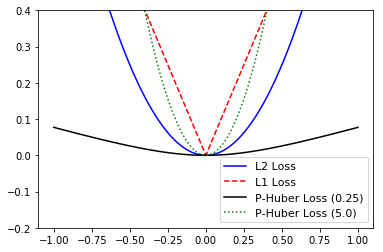

In [7]:
x_array = sess.run(x_vals)
plt.plot(x_array, l2_y_out, 'b-', label='L2 Loss')
plt.plot(x_array, l1_y_out, 'r--', label='L1 Loss')
plt.plot(x_array, phuber1_y_out, 'k-', label='P-Huber Loss (0.25)')
plt.plot(x_array, phuber2_y_out, 'g:', label='P-Huber Loss (5.0)')
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size':11})
plt.show()

##### < 분류 비용 함수 >

In [8]:
x_vals = tf.linspace(-3., 5., 500)
target = tf.constant(1.)
targets = tf.fill([500,], 1.)

##### 힌지 비용 함수
> 서포트 벡터 머신에서 주로 사용하지만, 신경망에서도 사용할 수 있다. <br>
> 두 분류 대상인 1과 -1에 대한 비용을 계산한다. <br>
> 대상 값에 가까울수록 비용 함수 값이 작아진다.

In [9]:
hinge_y_vals = tf.maximum(0., 1. - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

##### 교차 엔트로피 비용 함수 (로지스틱 비용 함수)
> 0과 1 두 분류를 예측할 때 사용한다. <br>
> 보통 0과 1 사이의 실수 값으로 주어지는 예측 결과와 실제 분류 값 사이의 거리를 측정해야한다.

In [10]:
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1. - target), tf.log(1. - x_vals))
xentropy_y_out = sess.run(xentropy_y_vals)

##### 시그모이드 교차 엔트로피 비용 함수
> x 값을 교차 엔트로피 비용함수에 넣기 전에 시그모이드 함수로 변환한다.

In [11]:
x_val_input = tf.expand_dims(x_vals, 1)
target_input = tf.expand_dims(targets, 1)
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(labels=target_input, logits=x_val_input)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

##### 가중 교차 엔트로피 비용 함수
> 시그모이드 교차 엔트로피 비용 함수에 가중치를 더한 것이다.

In [12]:
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(targets, x_vals, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

##### 소프트맥스 교차 엔트로피 비용 함수
> 정규화되지 않은 출력 값을 대상으로 한다. <br>
> softmax 함수를 이용해 결과 값을 확률 분포로 변환하고, 실제 확률 분포와 비교하는 방식으로 비용을 계산한다.

In [13]:
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=target_dist)
print(sess.run(softmax_xentropy))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

[1.1601256]


##### 희소 소프트맥스 교차 엔트로피 비용 함수
> 소프트맥스 교차 엔트로피 함수가 확률 분포를 대상으로 하는 것과 달리 실제 속한 분류가 어디인지를 표시한 지표를 대상으로 한다.

In [14]:
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist =  tf.constant([2])
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=sparse_target_dist)
print(sess.run(sparse_xentropy))

[0.00012564]


##### 시각화

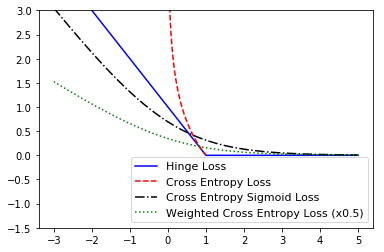

In [15]:
x_array = sess.run(x_vals)
plt.plot(x_array, hinge_y_out, 'b-', label='Hinge Loss')
plt.plot(x_array, xentropy_y_out, 'r--', label='Cross Entropy Loss')
plt.plot(x_array, xentropy_sigmoid_y_out, 'k-.', label='Cross Entropy Sigmoid Loss')
plt.plot(x_array, xentropy_weighted_y_out, 'g:', label='Weighted Cross Entropy Loss (x0.5)')
plt.ylim(-1.5, 3)
plt.legend(loc='lower right', prop={'size':11})
plt.show()

< 장단점 >

<table>
    <tr> <td>비용 함수</td> <td>사용</td> <td>장점</td> <td>단점</td> </tr>
    <tr> <td>L2</td> <td>회귀</td> <td>좀 더 안정적</td> <td>덜 견고함</td> </tr>
    <tr> <td>L1</td> <td>회귀</td> <td>좀 더 견고함</td> <td>덜 안정적</td> </tr>
    <tr> <td>의사-후버</td> <td>회귀</td> <td>좀 더 견고하고 안정적</td> <td>매개변수가 하나 추가됨</td> </tr>
    <tr> <td>한지</td> <td>분류</td> <td>SVM에서 사용할 최대 여백을 생성</td> <td>이상치가 비용에 무제한적으로 영향을 줄 수 있음</td> </tr>
    <tr> <td>교차-엔트로피</td> <td>분류</td> <td>좀 더 안정적</td> <td>비용이 무제한적으로 영향을 받음, 덜 견고함</td> </tr>
</table>

< 모델 평가 지표 >

<table>
    <tr> <td>모델 지표</td> <td>설명</td> </tr>
    <tr> <td>R-제곱</td> <td>선형 모델에서 독힙 데이터에 의한 종속 변수의 변이 비율을 나타내는 값</td> </tr>
    <tr> <td>RMSE</td> <td>연속량 예측 모델에서 평균 오차 제곱 총합의 제곱근 값, 예측 값과 실제 값 사이의 차이 측정</td> </tr>
    <tr> <td>혼동 행렬</td> <td>분류 예측 모델에서 예측된 분류 결과와 실제 분류를 행렬 형태로 비교</td> </tr>
    <tr> <td>재현율</td> <td>분류 예측 모델에서, 양성으로 예측된 값 중에서 실제 값도 양성인 비율을 나타내는 값</td> </tr>
    <tr> <td>정확도</td> <td>분류 예측 모델에서, 실제 값이 양성인 경우 중에서 예측된 값도 양성인 비율을 나타내는 값</td> </tr>
    <tr> <td>F-점수</td> <td>분류 예측 모델에서, 정확도와 재련율의 조화 평균값</td> </tr>
</table>